In [49]:
import pandas as pd
df = pd.read_csv("Charlotte_ProcessedDataSet.csv")
CH_restaurants_Cat = df

In [50]:
import pandas as pd
df = pd.read_json('business.json', lines=True)
df.categories = df.categories.fillna('No category')
df = df.loc[df['categories'].str.contains('Restaurants')]
df = df[df['state'].str.contains('NC')]
df = df[df['city'].str.contains('Charlotte')]

Business_Table_2 = df[['business_id', 'attributes']]
Business_Table_2['attributes'].apply(pd.Series)
Business_Table_2 = pd.concat([Business_Table_2.drop(['attributes'], axis=1), Business_Table_2['attributes'].apply(pd.Series)], axis=1)

In [51]:
CH_Business_Table = Business_Table_2.drop(['HappyHour', 'GoodForDancing','Smoking', 'GoodForMeal', 'Music', 'BikeParking', 'RestaurantsAttire', 'BusinessAcceptsBitcoin', 'ByAppointmentOnly', 'AcceptsInsurance', 'BusinessParking', 'Ambience', 'Caters', 'NoiseLevel', 'RestaurantsTableService', 'RestaurantsTakeOut','DriveThru', 'AgesAllowed', 'Corkage', 'CoatCheck', 'WheelchairAccessible', 'BestNights', 'BYOB', 'DietaryRestrictions', 'Open24Hours','DogsAllowed', 'BYOBCorkage'], axis=1)

In [52]:
CH_merged_attribs_Cats =  CH_Business_Table.merge(CH_restaurants_Cat, on='business_id')

In [53]:
CH_merged_attribs_Cats = CH_merged_attribs_Cats.drop(['name', 'address', 'city', 'state', 'postal_code', 'categories', 'HairSpecializesIn'], axis=1)
CH_merged_attribs_Cats

,business_id,GoodForKids,RestaurantsDelivery,Alcohol,WiFi,BusinessAcceptsCreditCards,RestaurantsGoodForGroups,OutdoorSeating,HasTV,RestaurantsReservations,RestaurantsPriceRange2,stars,review_count,is_open,TypeCuisine
0,gnKjwL_1w79qoiV3IC_xQQ,True,False,u'beer_and_wine',u'no',True,True,False,True,True,2,4.0,170,1,Japanese
1,BvYU3jvGd0TJ7IyZdfiN2Q,False,False,u'full_bar',NaN,True,True,False,NaN,True,2,3.5,16,0,Italian
2,_J_x_RaYTqAqAuCwgRhnRQ,False,False,u'full_bar',u'free',True,True,True,True,True,2,3.0,15,0,Mediterranean
3,U3kygJOTlTQFlfaZS7sQjA,True,False,u'beer_and_wine',u'free',True,True,True,True,True,1,4.0,380,1,American
4,CsLQLiRoafpJPJSkNX2h5Q,True,NaN,NaN,NaN,True,True,False,NaN,False,1,3.0,5,0,Mediterranean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,Ce5Y_Xl_A-QCilf5_3mkSw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,6,1,American
2670,fLdLjrLfwWJ-hh4Uwz2zKA,True,False,'full_bar',u'free',True,True,True,True,True,2,4.5,45,1,American
2671,NPFsOePej-_kfNsDf-SjpQ,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,4.5,5,1,Chinese
2672,dJXFp02urBN7pMd5329D_g,False,True,u'full_bar',u'free',True,True,True,True,True,2,2.5,38,1,American


In [54]:
#Change all null to False except price
#df2.dropna(subset=['three', 'four', 'five'], how='all')
CH_merged_attribs_Cats = CH_merged_attribs_Cats.dropna()
CH_merged_attribs_Cats

,business_id,GoodForKids,RestaurantsDelivery,Alcohol,WiFi,BusinessAcceptsCreditCards,RestaurantsGoodForGroups,OutdoorSeating,HasTV,RestaurantsReservations,RestaurantsPriceRange2,stars,review_count,is_open,TypeCuisine
0,gnKjwL_1w79qoiV3IC_xQQ,True,False,u'beer_and_wine',u'no',True,True,False,True,True,2,4.0,170,1,Japanese
2,_J_x_RaYTqAqAuCwgRhnRQ,False,False,u'full_bar',u'free',True,True,True,True,True,2,3.0,15,0,Mediterranean
3,U3kygJOTlTQFlfaZS7sQjA,True,False,u'beer_and_wine',u'free',True,True,True,True,True,1,4.0,380,1,American
6,xHZmM-kGXqOfmQNTm0T05g,True,False,u'full_bar',u'no',True,True,True,True,False,2,4.0,27,0,LatinAmerican
7,GiTv0gFXtYFQAzCXnPvepQ,True,False,'full_bar',u'no',True,True,False,True,False,2,2.5,48,1,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,eSUddfUno6dx5_Pz5YZg1w,True,False,u'none',u'free',True,True,True,True,False,1,4.0,5,1,American
2667,HsS34pXt9SAmaRa2aByNpw,True,False,u'none',u'no',True,True,False,False,False,1,4.0,14,1,American
2670,fLdLjrLfwWJ-hh4Uwz2zKA,True,False,'full_bar',u'free',True,True,True,True,True,2,4.5,45,1,American
2672,dJXFp02urBN7pMd5329D_g,False,True,u'full_bar',u'free',True,True,True,True,True,2,2.5,38,1,American


In [55]:
#Change WiFi to True and False
CH_merged_attribs_Cats = CH_merged_attribs_Cats.replace(to_replace = "'no'", value = "False")
CH_merged_attribs_Cats = CH_merged_attribs_Cats.replace(to_replace = "u'no'", value = "False")
CH_merged_attribs_Cats = CH_merged_attribs_Cats.replace(to_replace = "u'free'", value = "True")
CH_merged_attribs_Cats = CH_merged_attribs_Cats.replace(to_replace = "'free'", value = "True")
CH_merged_attribs_Cats = CH_merged_attribs_Cats.replace(to_replace = "'paid'", value = "True")
CH_merged_attribs_Cats = CH_merged_attribs_Cats.replace(to_replace = "u'paid'", value = "True")
CH_merged_attribs_Cats = CH_merged_attribs_Cats.replace(to_replace = "None", value = "False")

In [56]:
#Change Alcohol to True and False
CH_merged_attribs_Cats = CH_merged_attribs_Cats.replace(to_replace = "u'full_bar'", value = "True")
CH_merged_attribs_Cats = CH_merged_attribs_Cats.replace(to_replace = "u'beer_and_wine'", value = "True")
CH_merged_attribs_Cats = CH_merged_attribs_Cats.replace(to_replace = "'full_bar'", value = "True")
CH_merged_attribs_Cats = CH_merged_attribs_Cats.replace(to_replace = "'beer_and_wine'", value = "True")
CH_merged_attribs_Cats = CH_merged_attribs_Cats.replace(to_replace = "u'none'", value = "False")
CH_merged_attribs_Cats = CH_merged_attribs_Cats.replace(to_replace = "'none'", value = "False")
CH_merged_attribs_Cats = CH_merged_attribs_Cats.replace(to_replace = "None", value = "False")
CH_merged_attribs_Cats

,business_id,GoodForKids,RestaurantsDelivery,Alcohol,WiFi,BusinessAcceptsCreditCards,RestaurantsGoodForGroups,OutdoorSeating,HasTV,RestaurantsReservations,RestaurantsPriceRange2,stars,review_count,is_open,TypeCuisine
0,gnKjwL_1w79qoiV3IC_xQQ,True,False,True,False,True,True,False,True,True,2,4.0,170,1,Japanese
2,_J_x_RaYTqAqAuCwgRhnRQ,False,False,True,True,True,True,True,True,True,2,3.0,15,0,Mediterranean
3,U3kygJOTlTQFlfaZS7sQjA,True,False,True,True,True,True,True,True,True,1,4.0,380,1,American
6,xHZmM-kGXqOfmQNTm0T05g,True,False,True,False,True,True,True,True,False,2,4.0,27,0,LatinAmerican
7,GiTv0gFXtYFQAzCXnPvepQ,True,False,True,False,True,True,False,True,False,2,2.5,48,1,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,eSUddfUno6dx5_Pz5YZg1w,True,False,False,True,True,True,True,True,False,1,4.0,5,1,American
2667,HsS34pXt9SAmaRa2aByNpw,True,False,False,False,True,True,False,False,False,1,4.0,14,1,American
2670,fLdLjrLfwWJ-hh4Uwz2zKA,True,False,True,True,True,True,True,True,True,2,4.5,45,1,American
2672,dJXFp02urBN7pMd5329D_g,False,True,True,True,True,True,True,True,True,2,2.5,38,1,American


In [57]:
# Change RestaurantPriceRange2 False Values to 2
CH_merged_attribs_Cats.RestaurantsPriceRange2 = CH_merged_attribs_Cats.RestaurantsPriceRange2.replace(to_replace = "False", value = "2")

In [58]:
#Drop Values that does not have range prices
CH_merged_attribs_Cats = CH_merged_attribs_Cats.dropna()

In [59]:
#Convert stars column from float to int
CH_merged_attribs_Cats['stars'] = CH_merged_attribs_Cats['stars'] * 10
CH_merged_attribs_Cats['stars']= CH_merged_attribs_Cats['stars'].astype(int)

In [60]:
#Backup our DF
CH_LabelEncoder = CH_merged_attribs_Cats

In [61]:
# variance of the star column
CH_LabelEncoder.loc[:,"stars"].var()

49.81930348616707

In [62]:
#Highly Rated Column
CH_LabelEncoder.loc[(CH_LabelEncoder.stars <= 40) & (CH_LabelEncoder.review_count < 150), 'HighlyRated'] = 'False'
CH_LabelEncoder.loc[(CH_LabelEncoder.stars <= 40) & (CH_LabelEncoder.review_count > 150), 'HighlyRated'] = 'False'
CH_LabelEncoder.loc[(CH_LabelEncoder.stars >= 40) & (CH_LabelEncoder.review_count < 150), 'HighlyRated'] = 'False'
CH_LabelEncoder.loc[(CH_LabelEncoder.stars >= 40) & (CH_LabelEncoder.review_count > 150), 'HighlyRated'] = 'True' 
CH_LabelEncoder.loc[(CH_LabelEncoder.stars < 40) & (CH_LabelEncoder.review_count <= 150), 'HighlyRated'] = 'False'
CH_LabelEncoder.loc[(CH_LabelEncoder.stars < 40) & (CH_LabelEncoder.review_count >= 150), 'HighlyRated'] = 'False'
CH_LabelEncoder.loc[(CH_LabelEncoder.stars > 40) & (CH_LabelEncoder.review_count <= 150), 'HighlyRated'] = 'False'
CH_LabelEncoder.loc[(CH_LabelEncoder.stars > 40) & (CH_LabelEncoder.review_count >= 150), 'HighlyRated'] = 'True' 
CH_LabelEncoder.loc[(CH_LabelEncoder.stars == 40) & (CH_LabelEncoder.review_count == 150), 'HighlyRated'] = 'True'


In [63]:
#HighlyRated as Target
Target = CH_LabelEncoder['HighlyRated']

In [64]:
#Drop the Business_id column
CH_LabelEncoder = CH_LabelEncoder.drop(['business_id'], axis = 1)

In [65]:
from sklearn.preprocessing import LabelEncoder
le_OutdoorSeating = LabelEncoder()
le_BusinessAcceptsCreditCards = LabelEncoder()
le_RestaurantsDelivery = LabelEncoder()
le_RestaurantsReservations = LabelEncoder()
le_HasTV = LabelEncoder()
le_RestaurantsPriceRange2 = LabelEncoder()
le_RestaurantsGoodForGroups = LabelEncoder()
le_WiFi = LabelEncoder()
le_GoodForKids = LabelEncoder()
le_Alcohol = LabelEncoder()
le_stars = LabelEncoder()
le_review_count = LabelEncoder()
le_is_open = LabelEncoder()
le_TypeCuisine = LabelEncoder()
le_HighlyRated = LabelEncoder()

In [66]:
#Create new columns on our dataset using he new le values
CH_LabelEncoder['OutdoorSeating_New'] = le_OutdoorSeating.fit_transform(CH_LabelEncoder['OutdoorSeating'])
CH_LabelEncoder['BusinessAcceptsCreditCards_New'] = le_BusinessAcceptsCreditCards.fit_transform(CH_LabelEncoder['BusinessAcceptsCreditCards'])
CH_LabelEncoder['RestaurantsDelivery_New'] = le_RestaurantsDelivery.fit_transform(CH_LabelEncoder['RestaurantsDelivery'])
CH_LabelEncoder['RestaurantsReservations_New'] = le_RestaurantsReservations.fit_transform(CH_LabelEncoder['RestaurantsReservations'])
CH_LabelEncoder['HasTV_New'] = le_HasTV.fit_transform(CH_LabelEncoder['HasTV'])
CH_LabelEncoder['RestaurantsGoodForGroups_New'] = le_RestaurantsGoodForGroups.fit_transform(CH_LabelEncoder['RestaurantsGoodForGroups'])
CH_LabelEncoder['WiFi_New'] = le_WiFi.fit_transform(CH_LabelEncoder['WiFi'])
CH_LabelEncoder['GoodForKids_New'] = le_GoodForKids.fit_transform(CH_LabelEncoder['GoodForKids'])
CH_LabelEncoder['Alcohol_New'] = le_Alcohol.fit_transform(CH_LabelEncoder['Alcohol'])
#CH_LabelEncoder['TypeCuisine_New'] = le_TypeCusine.fit_transform(CH_LabelEncoder['TypeCuisine'])
CH_LabelEncoder['HighlyRated_New'] = le_HighlyRated.fit_transform(CH_LabelEncoder['HighlyRated'])
CH_LabelEncoder.head()


,GoodForKids,RestaurantsDelivery,Alcohol,WiFi,BusinessAcceptsCreditCards,RestaurantsGoodForGroups,OutdoorSeating,HasTV,RestaurantsReservations,RestaurantsPriceRange2,...,OutdoorSeating_New,BusinessAcceptsCreditCards_New,RestaurantsDelivery_New,RestaurantsReservations_New,HasTV_New,RestaurantsGoodForGroups_New,WiFi_New,GoodForKids_New,Alcohol_New,HighlyRated_New
0,True,False,True,False,True,True,False,True,True,2,...,0,1,0,1,1,1,0,1,1,1
2,False,False,True,True,True,True,True,True,True,2,...,1,1,0,1,1,1,1,0,1,0
3,True,False,True,True,True,True,True,True,True,1,...,1,1,0,1,1,1,1,1,1,1
6,True,False,True,False,True,True,True,True,False,2,...,1,1,0,0,1,1,0,1,1,0
7,True,False,True,False,True,True,False,True,False,2,...,0,1,0,0,1,1,0,1,1,0


In [67]:
#Create dummy variables for TypeCusine
cuisine_dummies = pd.get_dummies(CH_LabelEncoder.TypeCuisine, prefix='Cuisine')
CH_LabelEncoder = pd.concat([CH_LabelEncoder, cuisine_dummies], axis=1)

In [68]:
#Drop the original columns in favor of the numerical columns
CH_LabelEncoder = CH_LabelEncoder.drop(['OutdoorSeating', 'BusinessAcceptsCreditCards', 'RestaurantsDelivery', 'RestaurantsReservations', 'HasTV', 'RestaurantsGoodForGroups', 'WiFi', 'GoodForKids', 'Alcohol', 'TypeCuisine', 'HighlyRated'], axis=1)
CH_LabelEncoder

,RestaurantsPriceRange2,stars,review_count,is_open,OutdoorSeating_New,BusinessAcceptsCreditCards_New,RestaurantsDelivery_New,RestaurantsReservations_New,HasTV_New,RestaurantsGoodForGroups_New,...,Cuisine_Greek,Cuisine_Hawaiian,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Korean,Cuisine_LatinAmerican,Cuisine_Mediterranean,Cuisine_Mexican,Cuisine_Vietnamese
0,2,40,170,1,0,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2,2,30,15,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,1,40,380,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,2,40,27,0,1,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
7,2,25,48,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,1,40,5,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2667,1,40,14,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2670,2,45,45,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2672,2,25,38,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [69]:
CH_LabelEncoder.columns

Index(['RestaurantsPriceRange2', 'stars', 'review_count', 'is_open',
       'OutdoorSeating_New', 'BusinessAcceptsCreditCards_New',
       'RestaurantsDelivery_New', 'RestaurantsReservations_New', 'HasTV_New',
       'RestaurantsGoodForGroups_New', 'WiFi_New', 'GoodForKids_New',
       'Alcohol_New', 'HighlyRated_New', 'Cuisine_African', 'Cuisine_American',
       'Cuisine_Asian', 'Cuisine_Caribbean', 'Cuisine_Chinese',
       'Cuisine_European', 'Cuisine_French', 'Cuisine_Greek',
       'Cuisine_Hawaiian', 'Cuisine_Indian', 'Cuisine_Italian',
       'Cuisine_Japanese', 'Cuisine_Korean', 'Cuisine_LatinAmerican',
       'Cuisine_Mediterranean', 'Cuisine_Mexican', 'Cuisine_Vietnamese'],
      dtype='object')

In [70]:
#Make a copy before dropping HighlyRated_New, stars and review_count
CH_Complete = CH_LabelEncoder
CH_LabelEncoder = CH_LabelEncoder.drop(['HighlyRated_New'], axis=1)
CH_LabelEncoder = CH_LabelEncoder.drop(['stars'], axis=1)
CH_LabelEncoder = CH_LabelEncoder.drop(['review_count'], axis=1)
CH_LabelEncoder = CH_LabelEncoder.drop(['is_open'], axis=1)

In [71]:
CH_LabelEncoder.columns

Index(['RestaurantsPriceRange2', 'OutdoorSeating_New',
       'BusinessAcceptsCreditCards_New', 'RestaurantsDelivery_New',
       'RestaurantsReservations_New', 'HasTV_New',
       'RestaurantsGoodForGroups_New', 'WiFi_New', 'GoodForKids_New',
       'Alcohol_New', 'Cuisine_African', 'Cuisine_American', 'Cuisine_Asian',
       'Cuisine_Caribbean', 'Cuisine_Chinese', 'Cuisine_European',
       'Cuisine_French', 'Cuisine_Greek', 'Cuisine_Hawaiian', 'Cuisine_Indian',
       'Cuisine_Italian', 'Cuisine_Japanese', 'Cuisine_Korean',
       'Cuisine_LatinAmerican', 'Cuisine_Mediterranean', 'Cuisine_Mexican',
       'Cuisine_Vietnamese'],
      dtype='object')

In [72]:
CH_LabelEncoder.head()

,RestaurantsPriceRange2,OutdoorSeating_New,BusinessAcceptsCreditCards_New,RestaurantsDelivery_New,RestaurantsReservations_New,HasTV_New,RestaurantsGoodForGroups_New,WiFi_New,GoodForKids_New,Alcohol_New,...,Cuisine_Greek,Cuisine_Hawaiian,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Korean,Cuisine_LatinAmerican,Cuisine_Mediterranean,Cuisine_Mexican,Cuisine_Vietnamese
0,2,0,1,0,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2,2,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,2,1,1,0,0,1,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
7,2,0,1,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [73]:
CH_LabelEncoder.head()
X = CH_LabelEncoder
y = Target

In [74]:
#Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [75]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
pred = knn.predict(X)

In [76]:
#Set to K = 3
from sklearn import metrics
metrics.accuracy_score(y, knn.predict(X))

0.8580760095011877

In [77]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
metrics.accuracy_score(y, knn.predict(X))

0.8598574821852731

In [78]:
knn15 = KNeighborsClassifier(n_neighbors=15)
knn15.fit(X, y)
#knn15.predict_proba(X)
metrics.accuracy_score(y, knn15.predict(X))

0.8687648456057007

In [79]:
#Using the Train/Test Split Procedure
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

In [80]:
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((1263, 27), (1263,), (421, 27), (421,))

In [81]:
#Train the model on the training set
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [82]:
#And evaluate it on the test set
metrics.accuracy_score(y_test, knn3.predict(X_test))

0.8551068883610451

In [83]:
#  Now maybe 1 neighbor won't work as well?
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
metrics.accuracy_score(y_test, knn1.predict(X_test))

0.7980997624703088

In [84]:
#Comparing Testing Accuracy With Null Accuracy (The Low Bar) -- Should we work on this???

In [85]:
#Cross-Validation N=5
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
scores

array([0.82840237, 0.86982249, 0.84615385, 0.84615385, 0.86982249,
       0.86309524, 0.86309524, 0.8452381 , 0.85714286, 0.86227545])

In [86]:
(scores.mean(), scores.std())

(0.8551201907259024, 0.012597996595056855)

In [87]:
# From this we can get a 95% confidence interval on test accuracy
(scores.mean() - 2 * scores.std(), scores.mean() + 2 * scores.std())

(0.8299241975357887, 0.8803161839160161)

In [88]:
#Cross-Validation N=1
#Cross-validation can be used to estimate the test error associated with a learning method in order to evaluate
#its performance, or to select the appropriate level of flexibility
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X, y, cv=10)
(scores.mean() - 2*scores.std(), scores.mean() + 2 * scores.std())

(0.7515393633971671, 0.8292409188110285)

********SHOULD WE USE THIS*********

There is a tradeoff in choosing number of cross-validation folds
Fewer folds, faster, less aggressive use of test data (cv=1 is just a train/test split)
More folds, slower. cv=n-1 is "all but one validation

In [89]:
knn = KNeighborsClassifier(n_neighbors=10)
for v in (2, 10, 20, 50, 100, 200):
    cv = cross_val_score(knn, X, y, cv=v)
    print (v, cv.mean(), cv.std())

2 0.8663872444683292 0.001940157666902198
10 0.8669897736226616 0.0036810655605543437
20 0.8681705814856062 0.005154047213121403
50 0.8690491469314996 0.012592955300697324
100 0.8692524509803922 0.01966497115905014
200 0.8693194444444444 0.028770185479604807


In [90]:
#Hyperparameter Optimization
scores = []
for k in range(1, 200, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = cross_val_score(knn, X, y, cv=10)
    scores.append([k, cv.mean()])

In [91]:
scores[0]

[1, 0.7903901411040978]

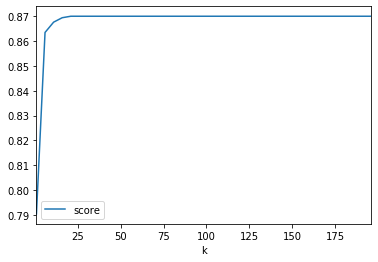

In [92]:
# This is a plot of test accuracy as a function of k

data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score')

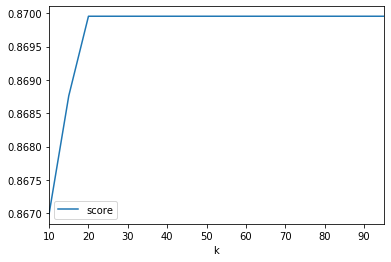

In [93]:
# Run between k range 10 and 100
scores = []
for k in range(10, 100, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = cross_val_score(knn, X, y, cv=10)
    scores.append([k, cv.mean()])
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

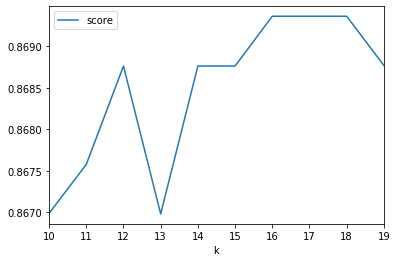

In [94]:
# K between 10 and 40
scores = []
for k in range(10, 20, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = cross_val_score(knn, X, y, cv=10)
    scores.append([k, cv.mean()])
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [95]:
#  Now maybe 17 neighbor
knn1 = KNeighborsClassifier(n_neighbors=17)
knn1.fit(X_train, y_train)
metrics.accuracy_score(y_test, knn1.predict(X_test))

0.8764845605700713